## Завдання.  
Застосуйте описані в лекції методи трансформації даних на датасеті Data_to_Transform, що міститься на GitHub в папці лекції. Цей датасет містить чотири колонки, що відповідають:
1. помірно зміщеним вправо даним (Moderate Positive Skew) 
2. сильно зміщеним вправо даним (Highly Positive Skew) 
3. помірно зміщеним вліво даним (Moderate Negative Skew) 
4. сильно зміщеним вліво даним (Highly Negative Skew)  

Оцініть результати трансформацій через квантильно-квантильні графіки.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer

In [3]:
df =  pd.read_csv('Data_to_Transform.csv')
df.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Moderate Positive Skew,10000.0,6.0,2.047237,0.899990,4.518431,5.751642,7.258956,16.204517
Highly Positive Skew,10000.0,6.0,1.882685,2.895074,4.614818,5.634956,6.924035,18.052331
Moderate Negative Skew,10000.0,6.0,2.045060,-6.335679,4.779235,6.233932,7.465319,11.180748
Highly Negative Skew,10000.0,6.0,1.860556,-7.036091,5.049961,6.360402,7.366753,9.027485


<AxesSubplot:xlabel='Highly Negative Skew', ylabel='Count'>

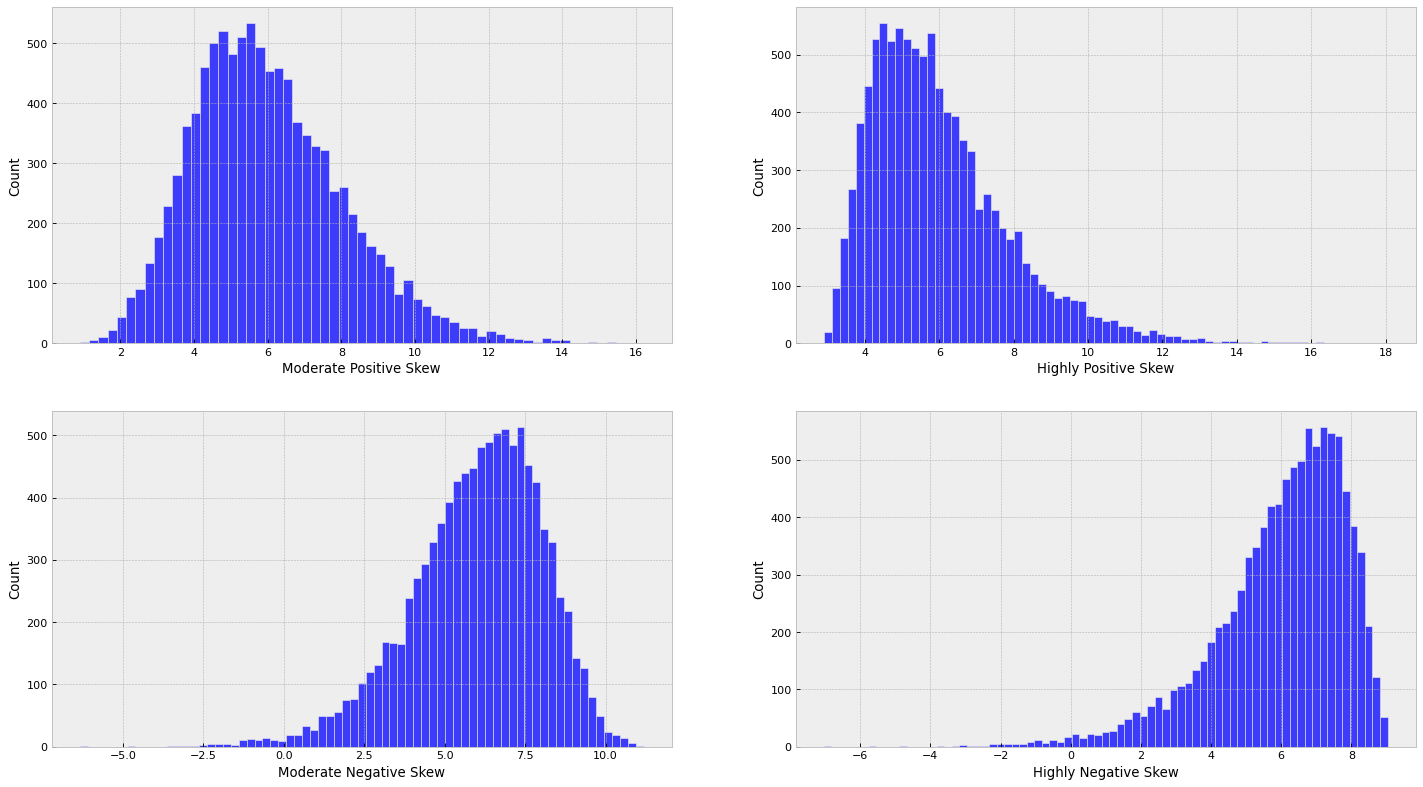

In [5]:
fig = plt.figure(figsize=(22, 12), dpi=80)
plt.style.use('bmh')

ax = fig.add_subplot(221)
sns.histplot(df['Moderate Positive Skew'])

ax = fig.add_subplot(222)
sns.histplot(df['Highly Positive Skew'])

ax = fig.add_subplot(223)
sns.histplot(df['Moderate Negative Skew'])

ax = fig.add_subplot(224)
sns.histplot(df['Highly Negative Skew'])

In [6]:
for col in df.columns:    
    stat, p = shapiro(df[col])
    print(col)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian\n')
    else:
        print('Probably not Gaussian\n')

Moderate Positive Skew
stat=0.976, p=0.000
Probably not Gaussian

Highly Positive Skew
stat=0.918, p=0.000
Probably not Gaussian

Moderate Negative Skew
stat=0.975, p=0.000
Probably not Gaussian

Highly Negative Skew
stat=0.924, p=0.000
Probably not Gaussian



C:\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Елементарна трансформація даних:

In [7]:
df_log10 = np.log10(df['Moderate Positive Skew'])
df_log10[:5]

0   -0.045762
1    0.046711
2    0.063270
3    0.101792
4    0.121860
Name: Moderate Positive Skew, dtype: float64

In [8]:
df_log = np.log(df['Highly Positive Skew'])
df_log[:5]

0    1.063011
1    1.085995
2    1.087342
3    1.098720
4    1.102640
Name: Highly Positive Skew, dtype: float64

In [9]:
df_cbrt = np.cbrt(df['Moderate Negative Skew'])
df_cbrt[-5:]

9995   -1.439170
9996   -1.465513
9997   -1.520786
9998   -1.673860
9999   -1.850395
Name: Moderate Negative Skew, dtype: float64

In [10]:
df_sq = (df['Highly Negative Skew'])**2
df_sq[-5:]

9995    10.594259
9996    14.230487
9997    22.259048
9998    32.154520
9999    49.506580
Name: Highly Negative Skew, dtype: float64

In [11]:
df_transformed = pd.concat([df_log10,df_log, df_cbrt, df_sq], axis=1)
df_transformed.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,-0.045762,1.063011,2.236095,81.495480
1,0.046711,1.085995,2.213344,81.175811
2,0.063270,1.087342,2.211642,81.110452
3,0.101792,1.098720,2.207999,81.002257
4,0.121860,1.102640,2.207216,80.663680


Text(0.5, 1.0, 'Highly Negative Skew Transformed')

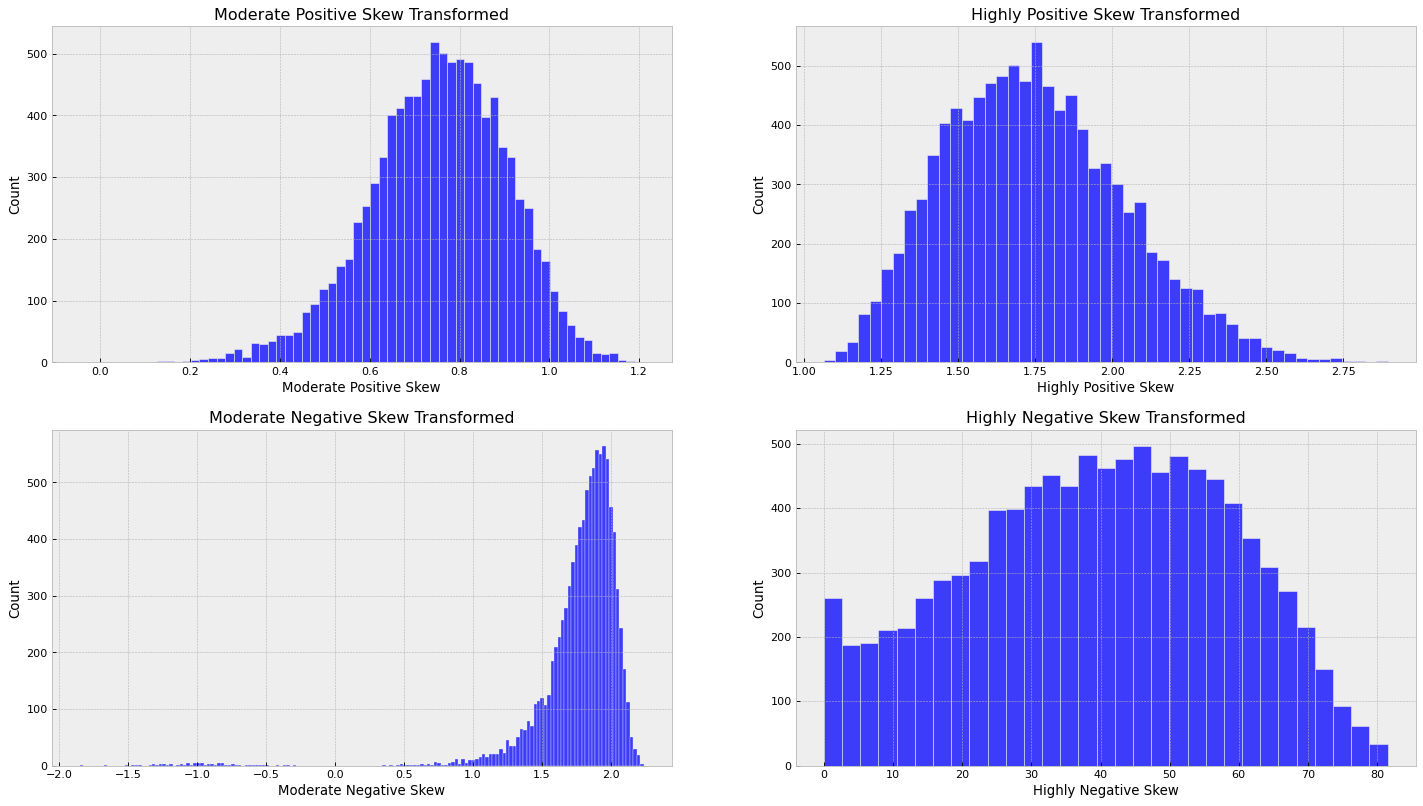

In [103]:
fig = plt.figure(figsize=(22, 12), dpi=80)
plt.style.use('bmh')

ax = fig.add_subplot(221)
sns.histplot(df_transformed['Moderate Positive Skew'])
ax.set_title('Moderate Positive Skew Transformed')

ax = fig.add_subplot(222)
sns.histplot(df_transformed['Highly Positive Skew'])
ax.set_title('Highly Positive Skew Transformed')

ax = fig.add_subplot(223)
sns.histplot(df_transformed['Moderate Negative Skew'])
ax.set_title('Moderate Negative Skew Transformed')

ax = fig.add_subplot(224)
sns.histplot(df_transformed['Highly Negative Skew'])
ax.set_title('Highly Negative Skew Transformed')

In [13]:
for col in df_transformed.columns:    
    stat, p = shapiro(df_transformed[col])
    print(col)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian\n')
    else:
        print('Probably not Gaussian\n')

Moderate Positive Skew
stat=0.992, p=0.000
Probably not Gaussian

Highly Positive Skew
stat=0.988, p=0.000
Probably not Gaussian

Moderate Negative Skew
stat=0.626, p=0.000
Probably not Gaussian

Highly Negative Skew
stat=0.982, p=0.000
Probably not Gaussian



C:\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5, 1.0, 'Highly Negative Skew Transformed')

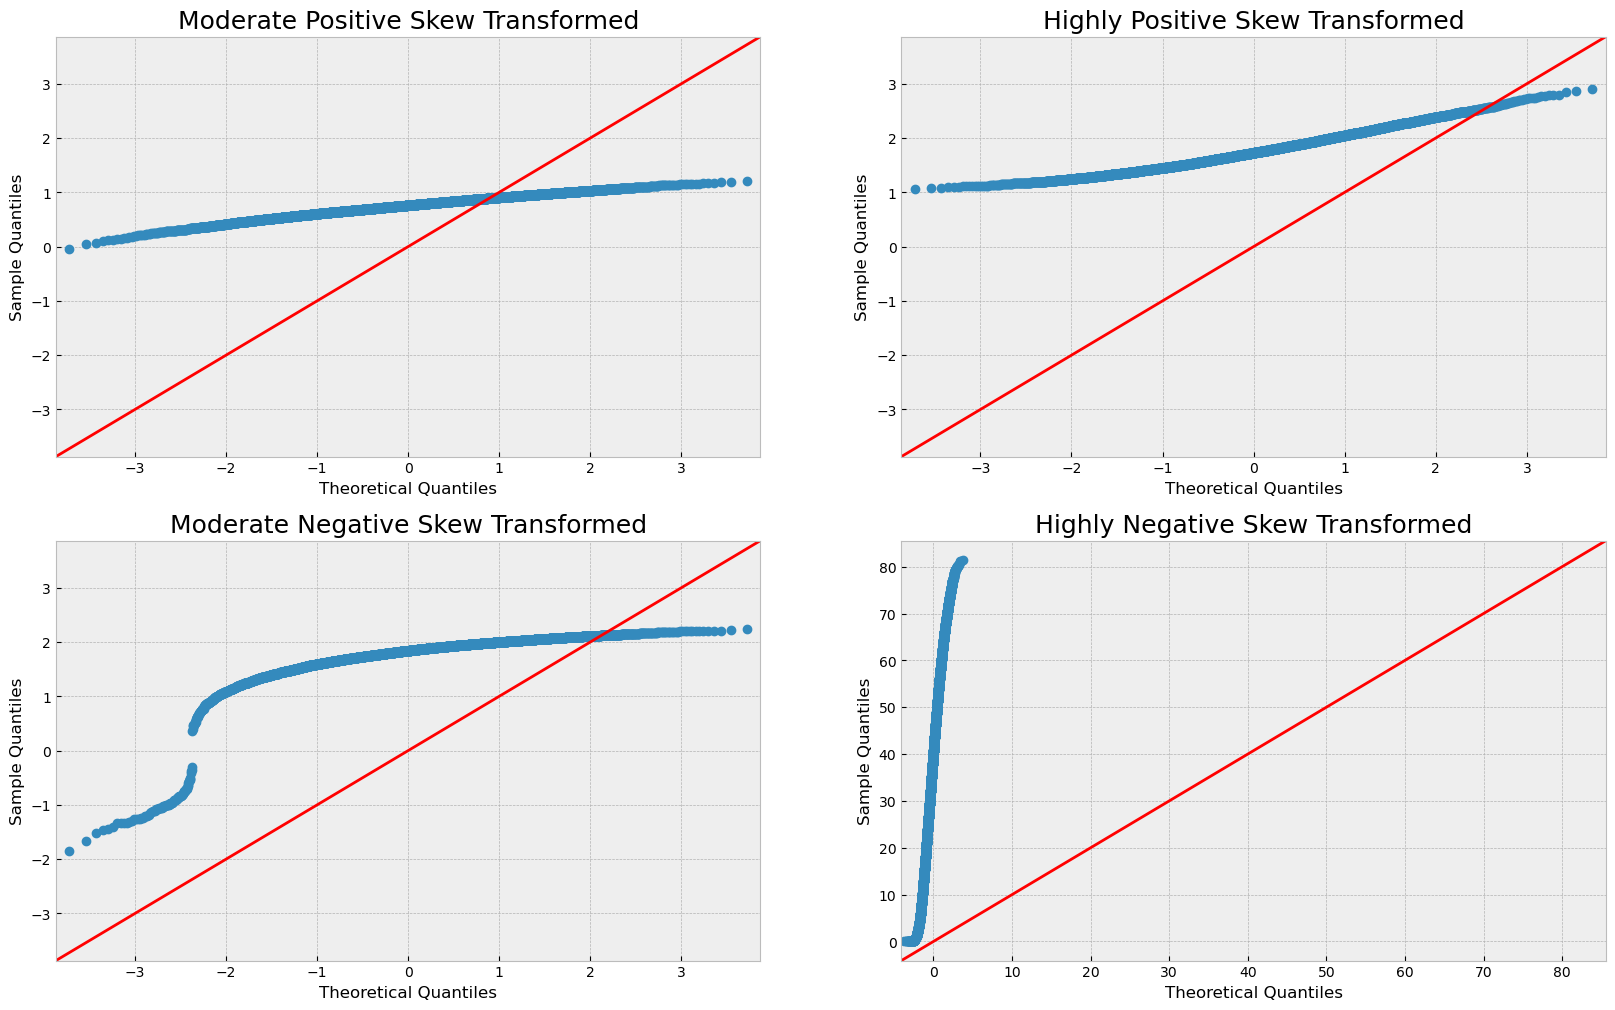

In [104]:
mpl.rcParams['axes.titlesize'] = 18
fig = plt.figure(figsize=(20,12))

ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(df_transformed['Moderate Positive Skew'], line='45', ax=ax)
ax.set_title('Moderate Positive Skew Transformed')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(df_transformed['Highly Positive Skew'], line='45', ax=ax)
ax.set_title('Highly Positive Skew Transformed')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(df_transformed['Moderate Negative Skew'], line='45', ax=ax)
ax.set_title('Moderate Negative Skew Transformed')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(df_transformed['Highly Negative Skew'], line='45', ax=ax)
ax.set_title('Highly Negative Skew Transformed')

### Тансформація даних методом Бокса-Кокса і Йео-Джонсона

In [100]:
pt_bc = PowerTransformer(method='box-cox')
pt_yj = PowerTransformer(method='yeo-johnson')
df_boxcox = pd.DataFrame(columns=['MPS', 'HPS', 'MNS', 'HNS'])
for i in range(len(df.columns)):
    if df.iloc[:, i].min() >= 0: 
        data_boxcox = pt_bc.fit_transform(df.iloc[:, i].values.reshape(-1, 1))
        df_boxcox.iloc[:, i] = data_boxcox.ravel()        
    else:
        data_boxcox = pt_yj.fit_transform(df.iloc[:, i].values.reshape(-1, 1))
        df_boxcox.iloc[:, i] = data_boxcox.ravel()     
df_boxcox.head()    

,MPS,HPS,MNS,HNS
0,-3.935147,-2.798959,3.089554,2.131559
1,-3.604197,-2.684560,2.855629,2.115779
2,-3.542261,-2.677899,2.838453,2.112552
3,-3.394896,-2.621817,2.801858,2.107210
4,-3.316277,-2.602573,2.794016,2.090493


Text(0.5, 1.0, 'Highly Negative Skew Transformed')

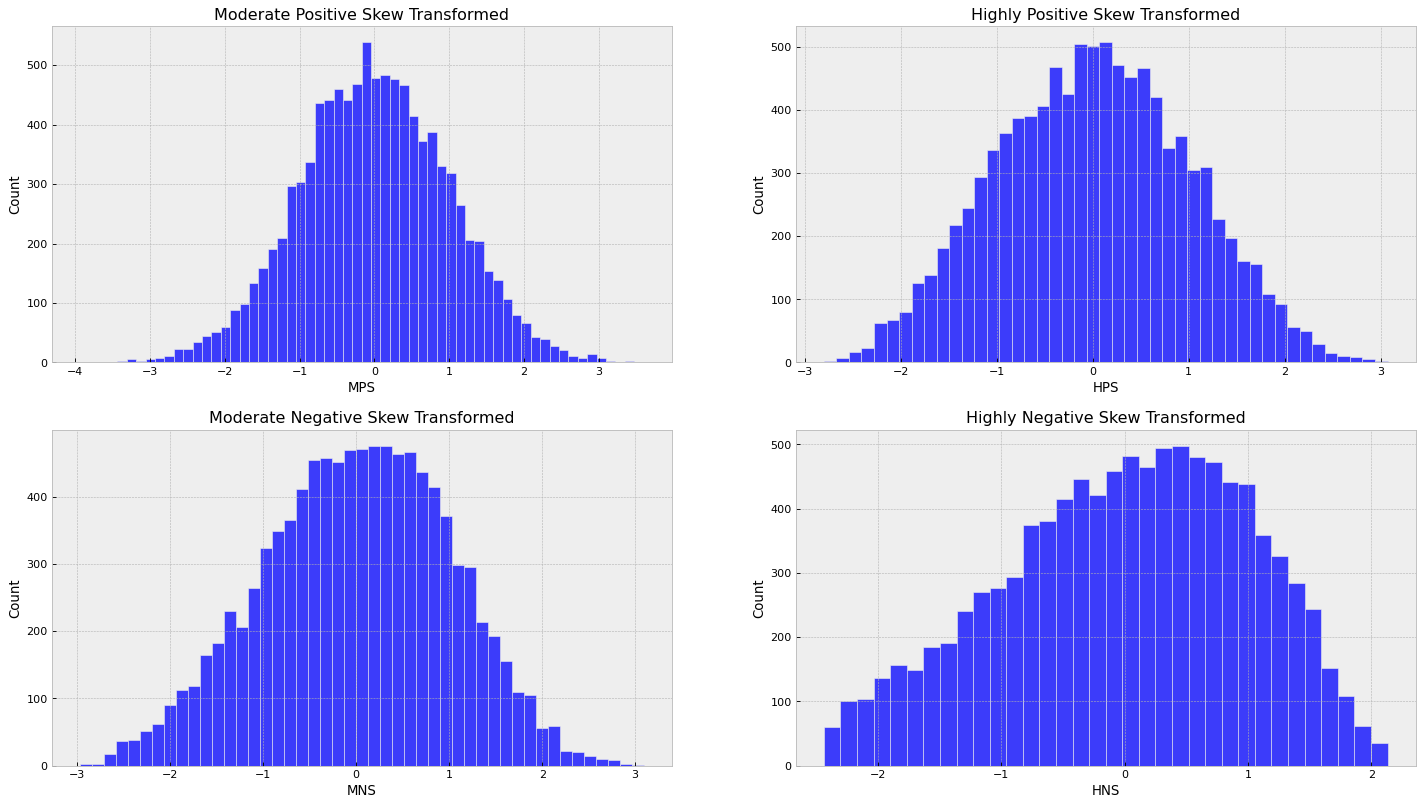

In [113]:
fig = plt.figure(figsize=(22, 12), dpi=80)
plt.style.use('bmh')

ax = fig.add_subplot(221)
sns.histplot(df_boxcox['MPS'])
ax.set_title('Moderate Positive Skew Transformed')

ax = fig.add_subplot(222)
sns.histplot(df_boxcox['HPS'])
ax.set_title('Highly Positive Skew Transformed')

ax = fig.add_subplot(223)
sns.histplot(df_boxcox['MNS'])
ax.set_title('Moderate Negative Skew Transformed')

ax = fig.add_subplot(224)
sns.histplot(df_boxcox['HNS'])
ax.set_title('Highly Negative Skew Transformed')

Text(0.5, 1.0, 'Highly Negative Skew Transformed')

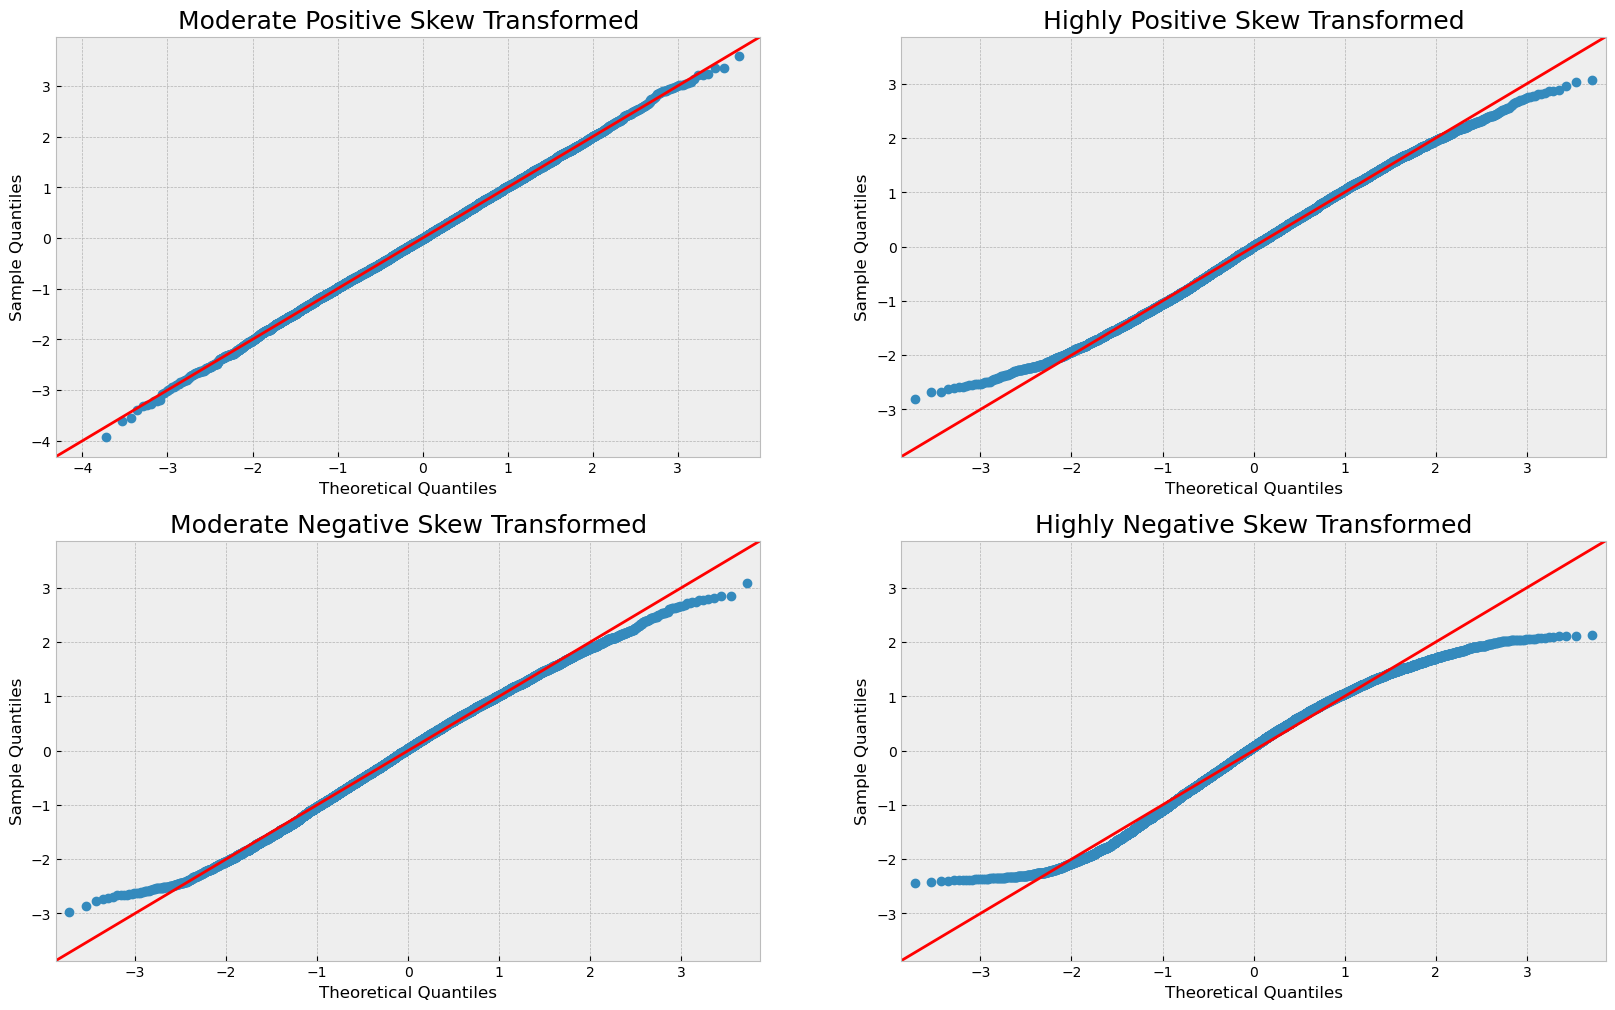

In [108]:
mpl.rcParams['axes.titlesize'] = 18
fig = plt.figure(figsize=(20,12))

ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(df_boxcox['MPS'], line='45', ax=ax)
ax.set_title('Moderate Positive Skew Transformed')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(df_boxcox['HPS'], line='45', ax=ax)
ax.set_title('Highly Positive Skew Transformed')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(df_boxcox['MNS'], line='45', ax=ax)
ax.set_title('Moderate Negative Skew Transformed')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(df_boxcox['HNS'], line='45', ax=ax)
ax.set_title('Highly Negative Skew Transformed')

In [110]:
for col in df_boxcox.columns:    
    stat, p = shapiro(df_boxcox[col])
    print(col)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian\n')
    else:
        print('Probably not Gaussian\n')

MPS
stat=1.000, p=0.712
Probably Gaussian

HPS
stat=0.997, p=0.000
Probably not Gaussian

MNS
stat=0.997, p=0.000
Probably not Gaussian

HNS
stat=0.983, p=0.000
Probably not Gaussian



C:\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Висновок:
### При застосуванні елементарних перетворень, форма гістограми покращилась, але не достатньо. Про це свідчать графіки Q-Q plot і тести Шапіро-Уілка.
### При застосуванні методу Бокса-Кокса дані майже вдалося нормалізувати. 